<a href="https://colab.research.google.com/github/delowerhossentuhin/Python-Pandas/blob/main/Outlier_Removed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
drive.mount("/content/drive")
dataset="/content/drive/MyDrive/Project and Coding/Machine Learning/Iris.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv(dataset)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
len(df['SepalLengthCm']) # Length of a column

150

In [6]:
df['PetalLengthCm'].unique() # Unique value of a column

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
for col in df.columns:
  print("Total missing values in %s is %s"%(col, df[col].isna().sum())) # finding missing values

Total missing values in Id is 0
Total missing values in SepalLengthCm is 0
Total missing values in SepalWidthCm is 0
Total missing values in PetalLengthCm is 0
Total missing values in PetalWidthCm is 0
Total missing values in Species is 0


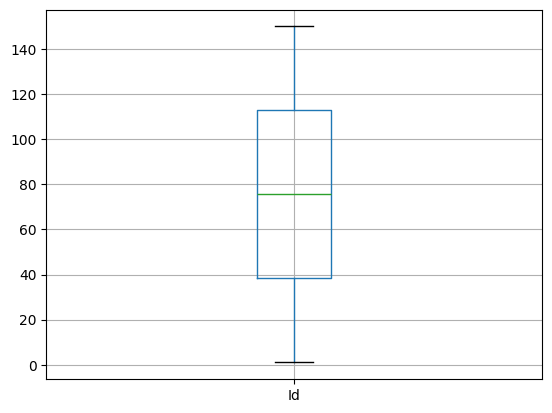

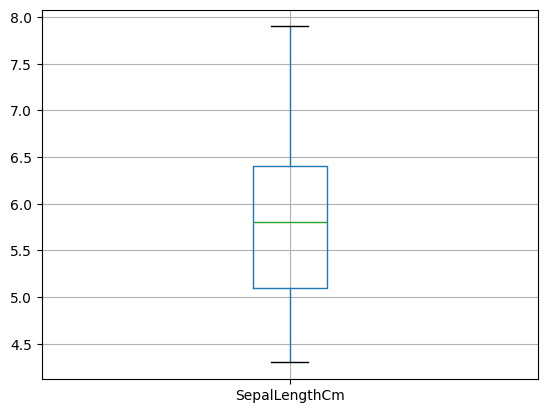

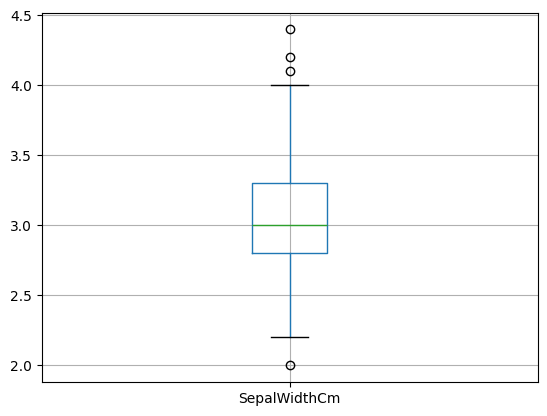

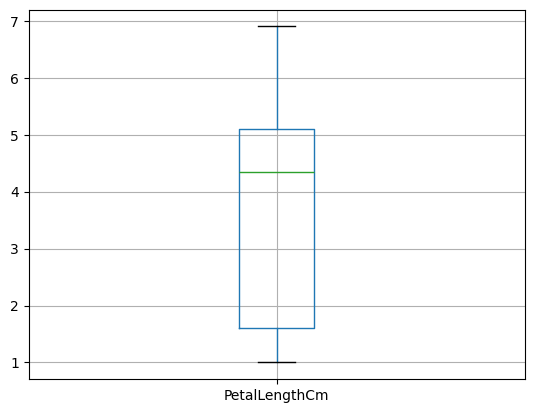

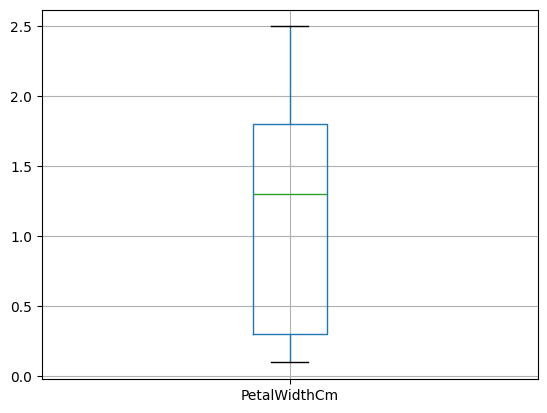

In [9]:
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):  # Ensure each column carry a numeric datatype
    df.boxplot(column=col)
    plt.show()

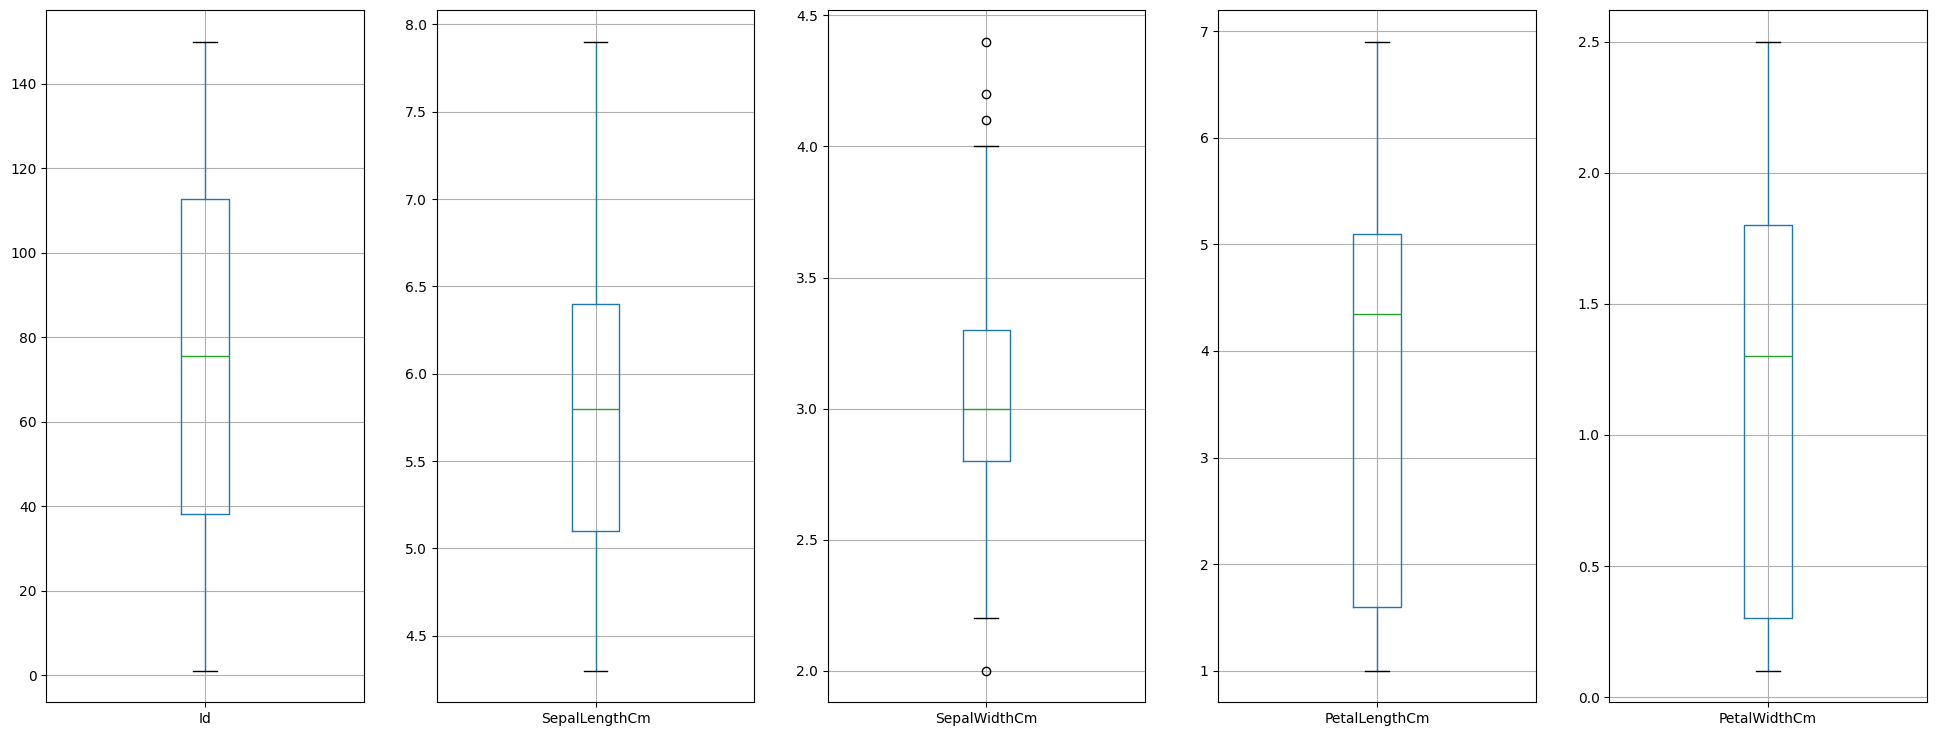

In [10]:
nCol= df.select_dtypes(include='number').columns
plt.figure(figsize=(20,8))
i = 1
for col in nCol:
  plt.subplot(1,len(nCol),i)
  df.boxplot(column=col)
  i+=1
plt.tight_layout(pad=3)
plt.show()


In [11]:
q1 = df['SepalWidthCm'].quantile(0.25)
q3 = df['SepalWidthCm'].quantile(0.75)
iqr = q3 - q1
print(f"{q1}\n{q3}\n{iqr}")

2.8
3.3
0.5


In [12]:
print(f"Lower Bounds = {q1 - 1.5*iqr}\n Higher Bounds = {q3 + 1.5*iqr}")

Lower Bounds = 2.05
 Higher Bounds = 4.05


In [13]:
outliers = df[(df['SepalWidthCm']<(q1 - 1.5* iqr)) | (df['SepalWidthCm'] > (q3 + 1.5 * iqr))]

In [14]:
print(outliers)

    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
15  16            5.7           4.4            1.5           0.4   
32  33            5.2           4.1            1.5           0.1   
33  34            5.5           4.2            1.4           0.2   
60  61            5.0           2.0            3.5           1.0   

            Species  
15      Iris-setosa  
32      Iris-setosa  
33      Iris-setosa  
60  Iris-versicolor  


In [15]:
df = df.drop(outliers.index) # outliers is been removed

In [16]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


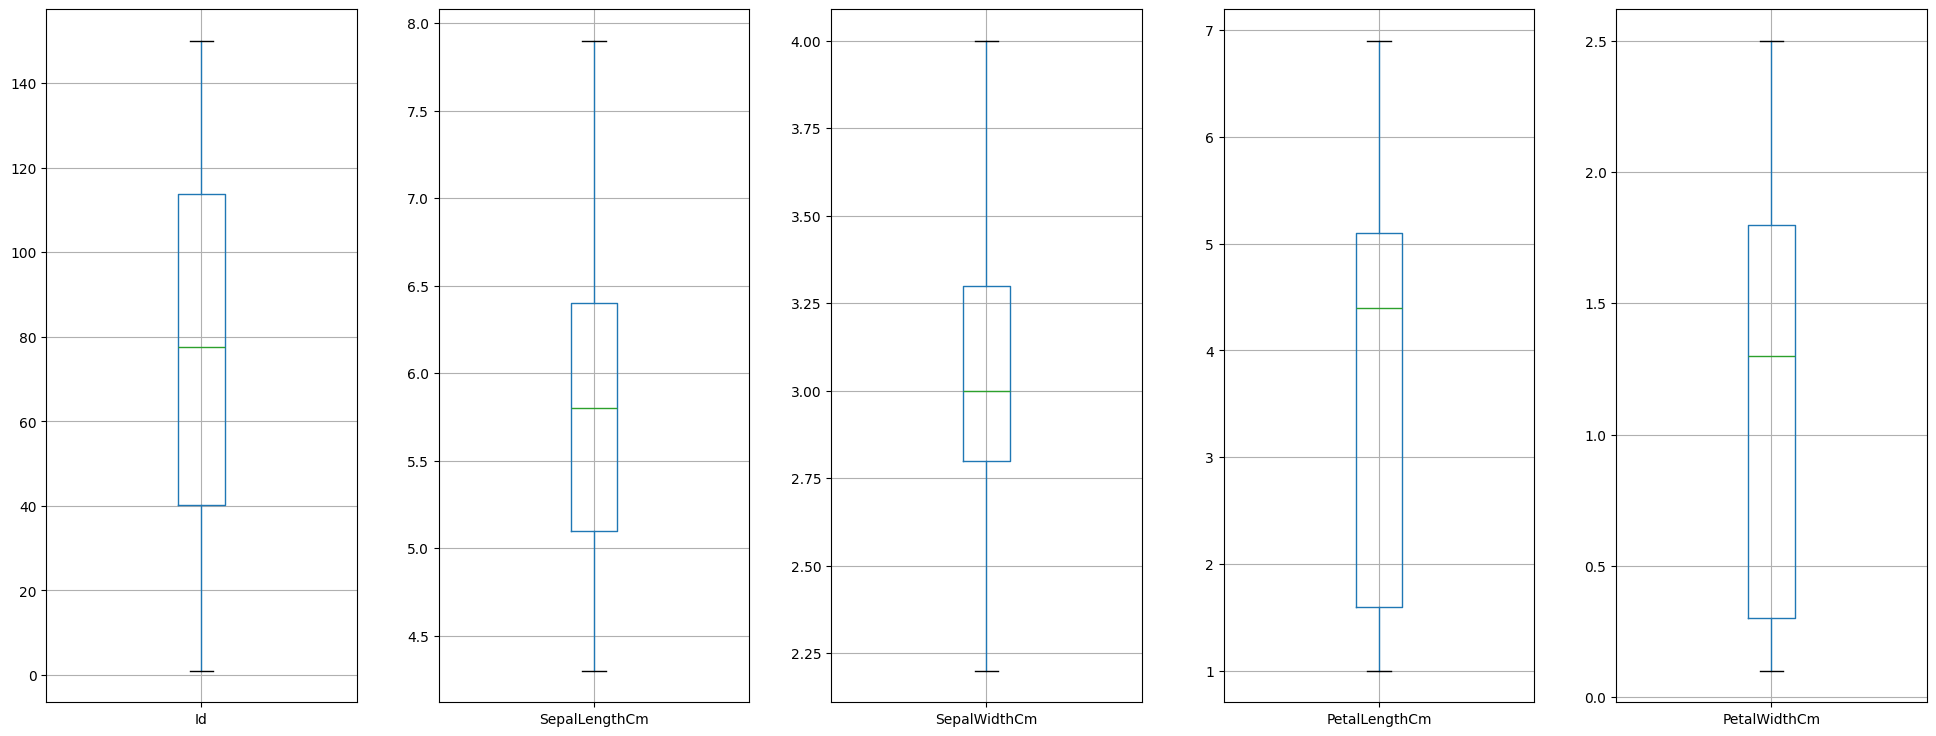

In [17]:
nCol= df.select_dtypes(include='number').columns
plt.figure(figsize=(20,8))
i = 1
for col in nCol:
  plt.subplot(1,len(nCol),i)
  df.boxplot(column=col)
  i+=1
plt.tight_layout(pad=3)
plt.show()

In [18]:
len(df)

146

In [19]:
df.to_csv("/content/drive/MyDrive/Project and Coding/Machine Learning/Updated Iris.csv",index=False)

In [20]:
df = pd.read_csv("/content/drive/MyDrive/Project and Coding/Machine Learning/Updated Iris.csv")

In [21]:
df.head(len(df))

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
141,146,6.7,3.0,5.2,2.3,Iris-virginica
142,147,6.3,2.5,5.0,1.9,Iris-virginica
143,148,6.5,3.0,5.2,2.0,Iris-virginica
144,149,6.2,3.4,5.4,2.3,Iris-virginica
